In [1036]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


DB_FILE = '../data/checking-logs.sqlite'

* analyze only the users and not the admins
* you can choose the color palette that you like for both of the graphs that you will
need to draw in this exercise
* use the table checker for your query
* use absolute values of the commits, not the averages
* sort the dataframes by the total number of commits made by a user
* at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):
  * ◦ “Which user has the most commits on Tue?” The answer: user_*. 
  * “Which user has the most commits on Thu?” The answer: user_*. 
  * “On which weekday do the users not like making a lot of commits?” The
answer, for example: Mon. 
  * “Which user at which hour made the largest number of commits?” The answer,
for example: user_1, 15

In [1037]:
con_obj = sqlite3.connect(DB_FILE)

query = """
  SELECT 
    uid,
    timestamp AS commit_time
  FROM checker
  WHERE uid LIKE 'user_%'
"""

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df = pd.read_sql(query, con_obj, parse_dates=['commit_time'])

df['weekday'] = df['commit_time'].dt.dayofweek
df['weekday'] = df['weekday'].apply(lambda x: weekdays[x])
df['hour'] = df['commit_time'].dt.hour
display(df.head())

,uid,commit_time,weekday,hour
0,user_4,2020-04-17 05:19:02.744528,Fri,5
1,user_4,2020-04-17 05:22:35.249331,Fri,5
2,user_4,2020-04-17 05:22:45.549397,Fri,5
3,user_4,2020-04-17 05:34:14.691200,Fri,5
4,user_4,2020-04-17 05:34:24.422370,Fri,5


In [1038]:
def get_matrix_dataframe(df: pd.DataFrame, pattern: str) -> pd.DataFrame:
  """ 
  Get the matrix dataframe for the given pattern
  """
  maxtrix_df = df.groupby(by=['uid', pattern]).agg(commit_count=('commit_time', 'count')).reset_index()
  maxtrix_df = maxtrix_df.pivot(index=pattern, columns='uid', values='commit_count')
  maxtrix_df = maxtrix_df.fillna(0).astype(int)

  total_commits = maxtrix_df.sum(axis=0).reset_index()
  total_commits.columns = ['uid', 'total_commits']
  sorted_users = total_commits.sort_values(by=['total_commits', 'uid'], ascending=False)['uid']
  maxtrix_df = maxtrix_df[sorted_users]

  if pattern == 'weekday':
    weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    weekday_cols = [col for col in maxtrix_df.index if col in weekday_order]
    ordered_cols = sorted(weekday_cols, key=lambda x: weekday_order.index(x))
    maxtrix_df = maxtrix_df.loc[ordered_cols]

    return maxtrix_df


  return maxtrix_df


df_weekdays_commits = get_matrix_dataframe(df, 'weekday')
df_hours_commits = get_matrix_dataframe(df, 'hour')

In [1039]:
display(df_weekdays_commits)

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,2,0,0,3
Tue,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,5,3,0,0,0
Wed,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,3,0,0,0,0
Thu,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,2,0,6,0
Fri,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
Sat,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
Sun,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,0,1,8,0,0


In [1040]:
display(df_hours_commits)

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,1,0,0,1,0
9,0,4,13,0,0,3,0,1,0,3,...,0,0,0,2,0,0,3,0,0,0
10,26,2,42,18,20,16,0,0,0,2,...,7,0,0,0,0,0,0,0,0,0


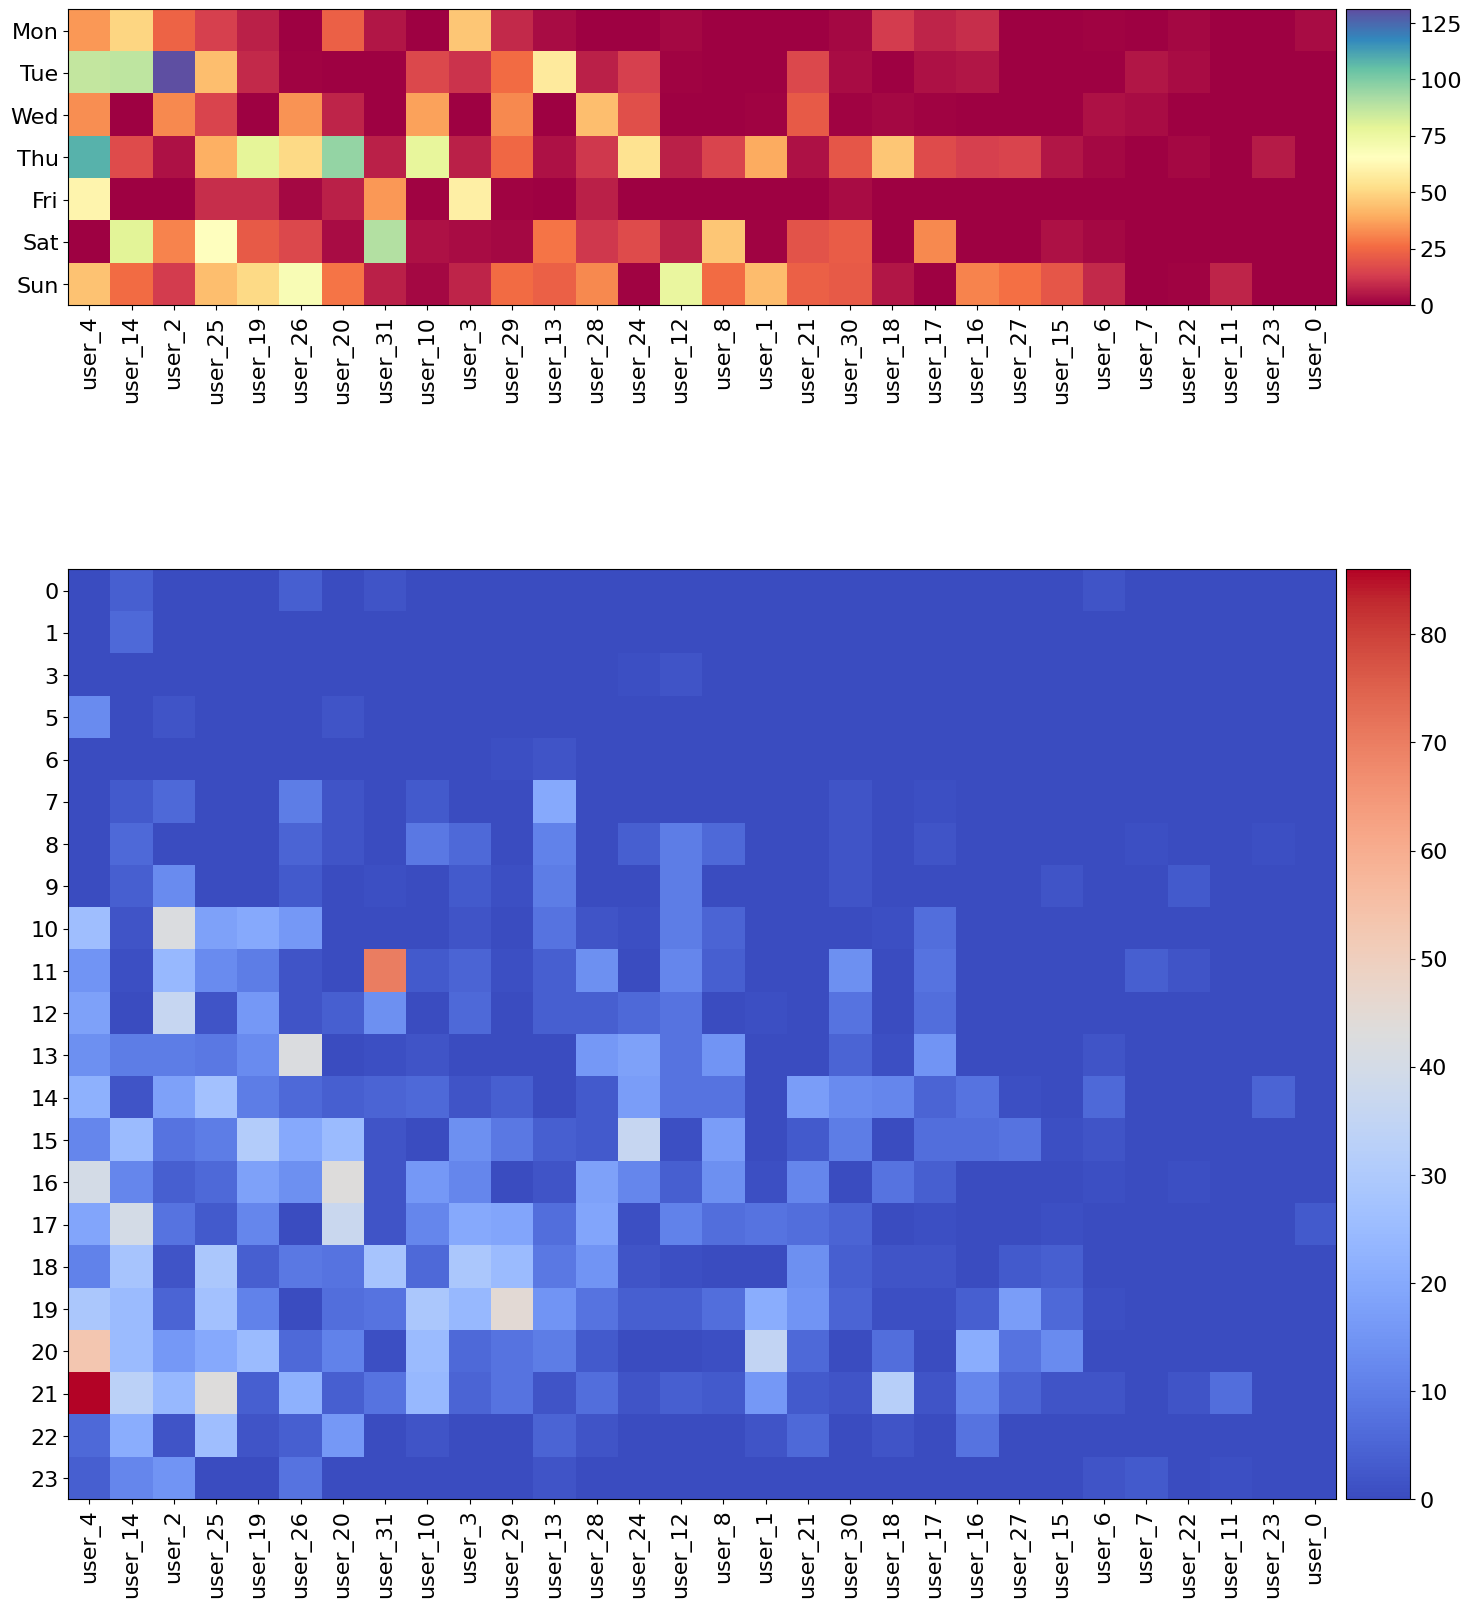

In [1041]:
def make_heatmap(df: pd.DataFrame, ax, colormap: str) -> None:
  """
  Make a heatmap for the given dataframe
  """
  im = ax.imshow(df, cmap=colormap, aspect='equal')
  ax.set_xticks(range(len(df.columns)))
  ax.set_xticklabels(df.columns, rotation=90)
  ax.set_yticks(range(len(df.index)))
  ax.set_yticklabels(df.index)
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.1)
  fig.colorbar(im, cax=cax, orientation='vertical')


fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))
make_heatmap(df_weekdays_commits, ax1, 'Spectral')
make_heatmap(df_hours_commits, ax2, 'coolwarm')
plt.tight_layout()
plt.rcParams.update({'font.size': 16})
plt.show()

* at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):
  * “Which user has the most commits on Tue?” The answer: user_*. 
  * “Which user has the most commits on Thu?” The answer: user_*. 
  * “On which weekday do the users not like making a lot of commits?” The
answer, for example: Mon. 
  * “Which user at which hour made the largest number of commits?” The answer,
for example: user_1, 15

1. user_2
2. user_4
3. Fri
4. user_4, 21

In [1042]:
con_obj.close()